In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import  KMeans
from sklearn.preprocessing import  StandardScaler
import warnings
import numpy as np
import seaborn as sns



In [128]:
df = pd.read_csv("penguins.csv")
print("Shape of data is:", df.shape)
df.head(5)

Shape of data is: (344, 5)


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [129]:
for i in df.columns:
    print("Blanks in column:",i, df[i].isna().sum())


Blanks in column: culmen_length_mm 2
Blanks in column: culmen_depth_mm 2
Blanks in column: flipper_length_mm 2
Blanks in column: body_mass_g 2
Blanks in column: sex 9


In [138]:
df = df[~df['culmen_length_mm'].isna()].reset_index(drop= True)
df = df[(df['flipper_length_mm']<800) & (df['flipper_length_mm']>0)].reset_index(drop= True)
df = df[df['sex'] != '.'].reset_index(drop= True)

df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
334,47.2,13.7,214.0,4925.0,FEMALE
335,46.8,14.3,215.0,4850.0,FEMALE
336,50.4,15.7,222.0,5750.0,MALE
337,45.2,14.8,212.0,5200.0,FEMALE


59.6 32.1


(array([ 8., 40., 57., 47., 48., 55., 61., 16.,  5.,  2.]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

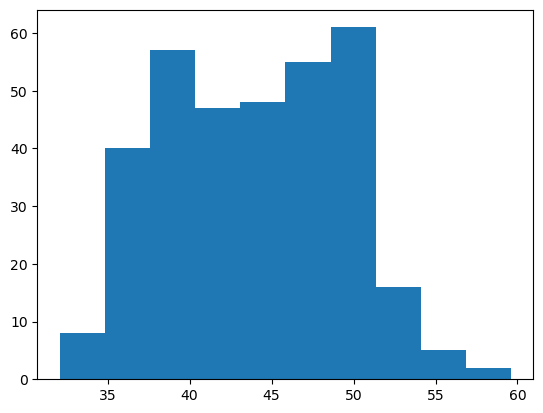

In [139]:
print(df['culmen_length_mm'].max(), df['culmen_length_mm'].min())

plt.hist(df['culmen_length_mm'])

21.5 13.1


(array([21., 35., 32., 33., 44., 55., 56., 39., 15.,  9.]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <BarContainer object of 10 artists>)

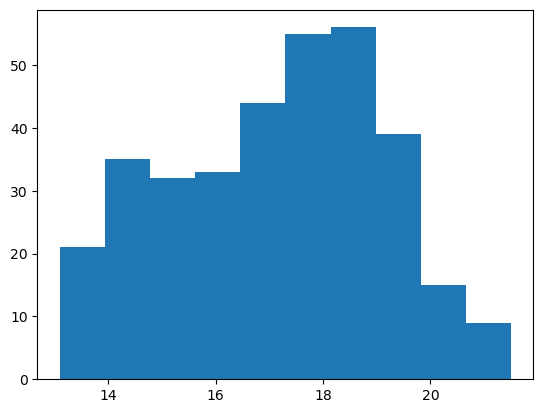

In [140]:
print(df['culmen_depth_mm'].max(),df['culmen_depth_mm'].min())
plt.hist(df['culmen_depth_mm'])

(array([15., 43., 71., 53., 40., 41., 27., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <BarContainer object of 10 artists>)

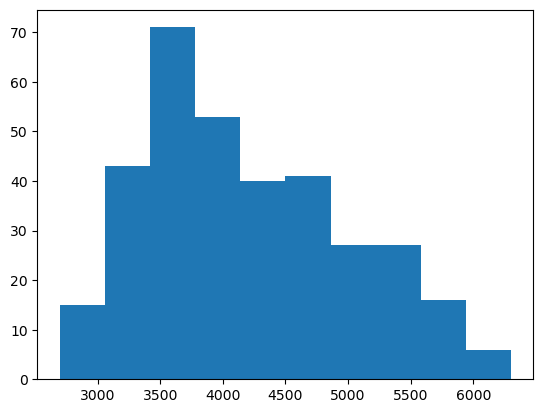

In [141]:

plt.hist(df['body_mass_g'])

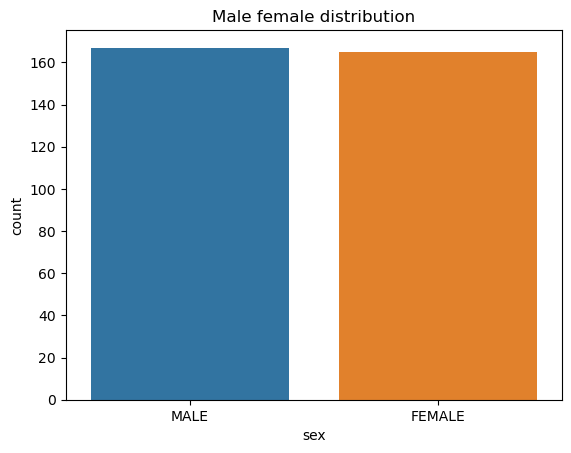

In [143]:
sns.countplot(data = df, x = 'sex')
plt.title("Male female distribution")
plt.show()

In [146]:
df['body_mass_g'] = df['body_mass_g']/1000

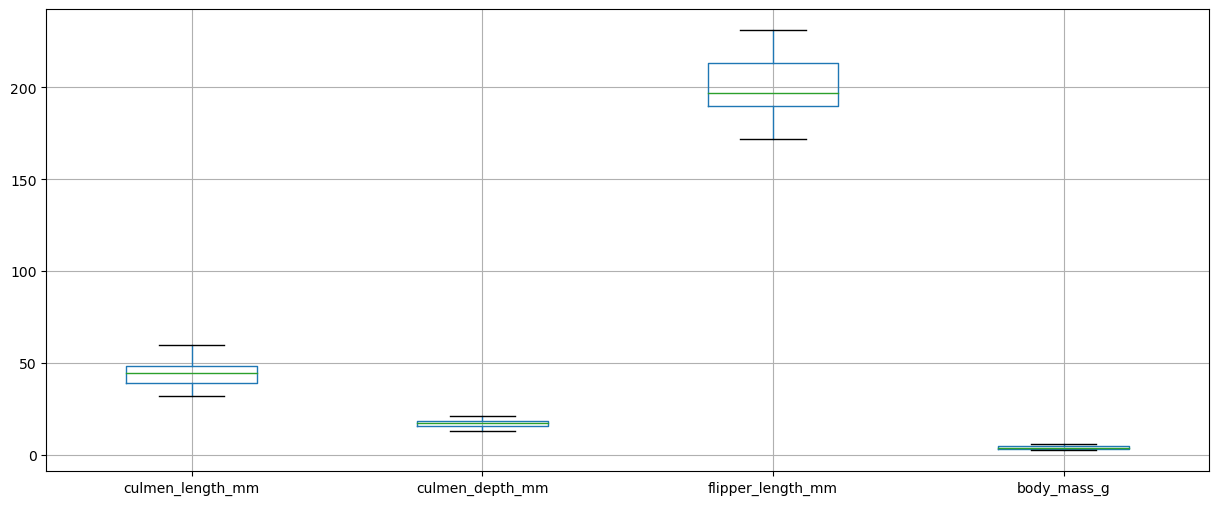

In [147]:
fig = plt.figure(figsize=(15,6))
df.boxplot()
plt.show()

In [16]:
df2 = pd.get_dummies(df1).drop("sex_.", axis=1)
df2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,NaN,NaN,NaN,NaN,0,0
4,36.7,19.3,193.0,3450.0,1,0
...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,0,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [17]:
# perform preprocessing steps on the dataset - scaling

scalar = StandardScaler()

X = scalar.fit_transform(df2)


In [18]:
df_preprocessed = pd.DataFrame(data=X, columns=df2.columns)
df_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.891957,0.801132,-1.418431,-0.561641,-0.965507,1.023672
1,-0.818470,0.137526,-1.063039,-0.499379,1.035725,-0.976875
2,-0.671494,0.443806,-0.423334,-1.184262,1.035725,-0.976875
3,NaN,NaN,NaN,NaN,-0.965507,-0.976875
4,-1.332884,1.107412,-0.565491,-0.935214,1.035725,-0.976875
...,...,...,...,...,...,...
337,NaN,NaN,NaN,NaN,-0.965507,-0.976875
338,0.522681,-1.444920,0.998233,0.808126,1.035725,-0.976875
339,1.184071,-0.730267,1.495781,1.928844,-0.965507,1.023672
340,0.228731,-1.189687,0.784998,1.243961,1.035725,-0.976875


In [19]:
import numpy as np
df_preprocessed = df_preprocessed.replace(np.nan, 0)

In [20]:
# apply PCA 

pca = PCA(n_components= None)

dfx_pca = pca.fit(df_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_>0.1)
print("Components :", n_components)
pca = PCA(n_components= n_components)
df_pca = pca.fit_transform(df_preprocessed)

Components : 2


In [21]:
dfx_pca.explained_variance_ratio_


array([0.51558313, 0.34040926, 0.08511355, 0.03260193, 0.01722915,
       0.00906298])

c:\Users\Ai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Ai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

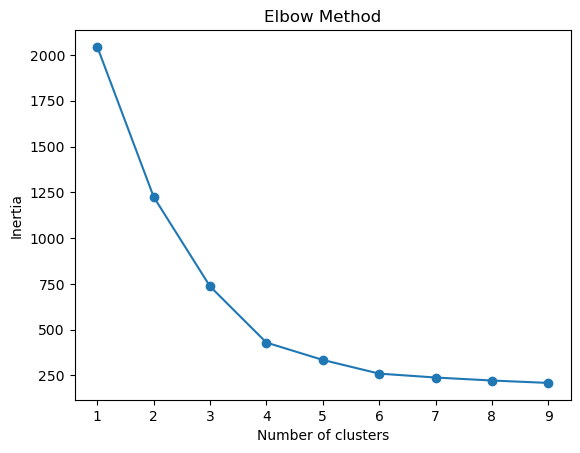

In [24]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_preprocessed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4

c:\Users\Ai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


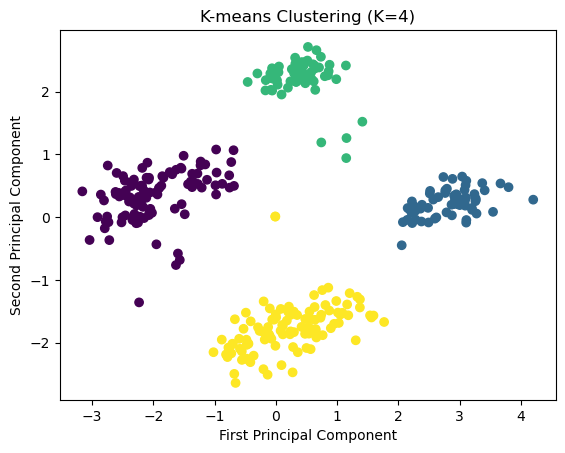

In [23]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_preprocessed)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()